## 제품 review 데이터의 감성 분석
1. 데이터
학번이 홀수로 끝나기 때문에 amazon_uk_shoes_products_dataset_2021_12.csv 데이터 사용

2. 데이터 전처리
데이터 정리 (노이즈 제거, 결측값 처리 등).
텍스트 토큰화 및 불용어 제거.
텍스트 정규화 (스테밍 또는 표제어 추출).
3. 모델 구현
수업에서 활용한 모델 VADER을 적용
4. 모델 학습 및 튜닝
데이터셋을 학습 및 테스트 세트로 분할.
모델 학습 및 하이퍼파라미터 튜닝 (예: 그리드 서치 또는 랜덤 서치 사용).
교차 검증과 같은 기술을 사용하여 견고성 보장.
5. 모델 평가
정확도, 정밀도, 재현율, F1 점수 및 ROC-AUC와 같은 지표를 사용하여 모델 평가.
오버피팅과 언더피팅을 논의하고 이를 해결하는 방법 학습.
6. 시각화 및 보고
Matplotlib 또는 Seaborn과 같은 라이브러리를 사용하여 결과 시각화.
혼동 행렬 및 ROC 곡선 생성.

In [17]:
# 필요한 라이브러리 설치
%pip install nltk
%pip install pandas # pandas 설치
%pip install matplotlib # 시각화 목적 matplotlib 설치
%pip install seaborn

# nltk 라이브러리 가져오기
import nltk as nltk

# 필요한 nltk 데이터 다운로드
nltk.download('vader_lexicon')  # 감성 분석을 위한 VADER 사전 다운로드
nltk.download('punkt')          # 텍스트 토큰화를 위한 punkt 데이터 다운로드
nltk.download('stopwords')      # 불용어 리스트 다운로드
nltk.download('wordnet')        # 워드넷 데이터 다운로드


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
# 필요한 라이브러리 임포트
import time
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 matplotlib
import seaborn as sns  # 데이터 시각화를 위한 seaborn
import re  #정규 표현식을 위한 re
import warnings  # 경고 무시를 위한 warnings
from pandas import * #데이터프레임 pandas
from nltk.corpus import stopwords  # 불용어 처리
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # nltk의 VADER 감정 분석기를 가져옴
from nltk.tokenize import word_tokenize  #텍스트 토큰화를 위한 word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer  # 형태소 분석을 위한 Lemmatizer와 Stemmer

# 경고 메시지 무시 설정
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

In [19]:
first_data = read_csv("./amazon_uk_shoes_products_dataset_2021_12.csv")

first_data.head()

,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
0,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,True,Reviewed in the United States on 2 June 2020,2 people found this helpful,36eae4e5-2894-5279-a0b7-d2b330e2b814,24/12/2021 02:26:25
1,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,True,Reviewed in the United States on 28 October 2021,NaN,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,24/12/2021 02:26:25
2,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,True,Reviewed in the United States on 20 January 2021,NaN,db5a7525-d40b-5265-84d8-df4f29837a3b,24/12/2021 02:26:25
3,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0,True,Reviewed in the United States on 22 April 2021,NaN,75a42851-6462-54b5-988a-27d336221943,24/12/2021 02:26:25
4,https://www.amazon.co.uk/dp/B08SW434MG,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0,True,Reviewed in Italy on 2 April 2021,2 people found this helpful,232dee43-849e-5d06-ba05-efb3f4814714,24/12/2021 02:26:25


1. url - 상품 링크
2. product_name - 상품 이름
3. reviewer_name - 리뷰 작성자 이름
4. review_title - 리뷰 제목
5. review_text - 리뷰 내용
6. review_rating - 리뷰 별점 값
7. verified_purchase - 구매 여부
8. review_date - 리뷰 작성일
9. helpful_count - 도움 되었다고 누른 사람의 수
10. uniq_id - 리뷰 아이디
11. scraped_at - 리뷰 스크랩 날짜

In [20]:
# 필요한 컬럼만 선택
data = first_data[['review_title', 'review_text', 'review_rating']]

# 결측값 제거
data = data.dropna(subset=['review_text', 'review_title'])

# 결과 확인
data.head()

,review_title,review_text,review_rating
0,Love em,Love these. Was looking for converses and thes...,5.0
1,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0
2,Good quality,Good quality,5.0
3,Good,Great,5.0
4,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0


In [21]:

# 전처리 함수 정의

import string

def preprocess_text(text):
    text = text.lower()  # 소문자로 변환
    text = text.translate(str.maketrans('', '', string.punctuation))  # 구두점 제거
    tokens = word_tokenize(text)  # 토큰화
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # 불용어 제거
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # 표제어 추출
    return ' '.join(tokens)

# 텍스트 전처리 적용
data['cleaned_text'] = data['review_text'].apply(preprocess_text)

data.head()



,review_title,review_text,review_rating,cleaned_text
0,Love em,Love these. Was looking for converses and thes...,5.0,love looking converse half price unique— ’ nev...
1,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,shoe cute 2nd day wearing tongue started rippi...
2,Good quality,Good quality,5.0,good quality
3,Good,Great,5.0,great
4,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0,ho scelto il modello bianco con rifinitura die...


In [22]:
#감성레이블 생성
data['sentiment'] = data['review_rating'].apply(lambda x: 1 if x >= 3 else 0)
print(data.head())

         review_title                                        review_text  \
0             Love em  Love these. Was looking for converses and thes...   
1  The plastic ripped  The shoes are very cute, but after the 2nd day...   
2        Good quality                                       Good quality   
3                Good                                              Great   
4          PERFETTE!!  Ho scelto il modello bianco con rifinitura die...   

   review_rating                                       cleaned_text  sentiment  
0            5.0  love looking converse half price unique— ’ nev...          1  
1            2.0  shoe cute 2nd day wearing tongue started rippi...          0  
2            5.0                                       good quality          1  
3            5.0                                              great          1  
4            5.0  ho scelto il modello bianco con rifinitura die...          1  


In [23]:
# 필요한 라이브러리 임포트
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 로지스틱 회귀 모델 초기화
model = LogisticRegression()

# 하이퍼파라미터 그리드 설정
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# 그리드 서치 객체 생성 (모델, 하이퍼파라미터 그리드, 교차 검증 횟수, 평가 지표 설정)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")

# 그리드 서치 실행 (훈련 데이터에 맞추어 모델 학습)
grid_search.fit(X_train, y_train)

# 테스트 데이터에 대한 최적 모델의 성능 평가
score = grid_search.score(X_test, y_test)

# 최적 하이퍼파라미터와 테스트 정확도 출력
print("Best parameters:", grid_search.best_params_)
print("Test accuracy:", score)

Best parameters: {'C': 10}
Test accuracy: 0.8686720469552458


In [24]:
# 최적의 모델을 사용하여 데이터 학습 진행
final_model = grid_search.best_estimator_  # 그리드 서치를 통해 찾은 최적의 모델 추출
final_model.fit(X_train, y_train)  # 훈련 데이터를 사용하여 최적 모델 학습
y_pred = final_model.predict(X_test)  # 테스트 데이터에 대한 예측값 생성

In [25]:
# 평가
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

evaluation_results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

print(evaluation_results)

{'Accuracy': 0.8686720469552458, 'Precision': 0.8933224755700325, 'Recall': 0.9580786026200874, 'F1 Score': 0.9245680573114201, 'ROC AUC': 0.8778394295100357}


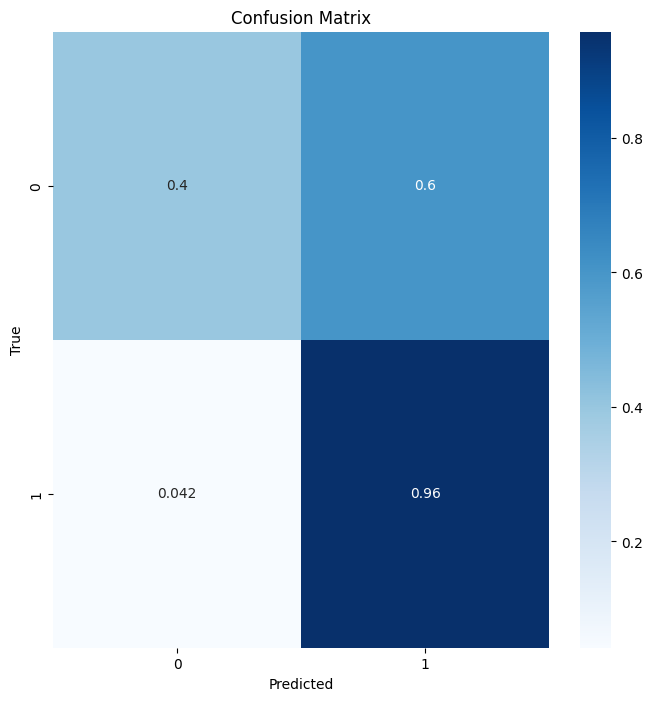

In [26]:
#confusion_matrix로 결과 확인
cm = confusion_matrix(y_test, y_pred, labels = None, sample_weight = None, normalize = 'true')

plt.figure(figsize = (8, 8))
sns.heatmap(cm, annot = True, cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

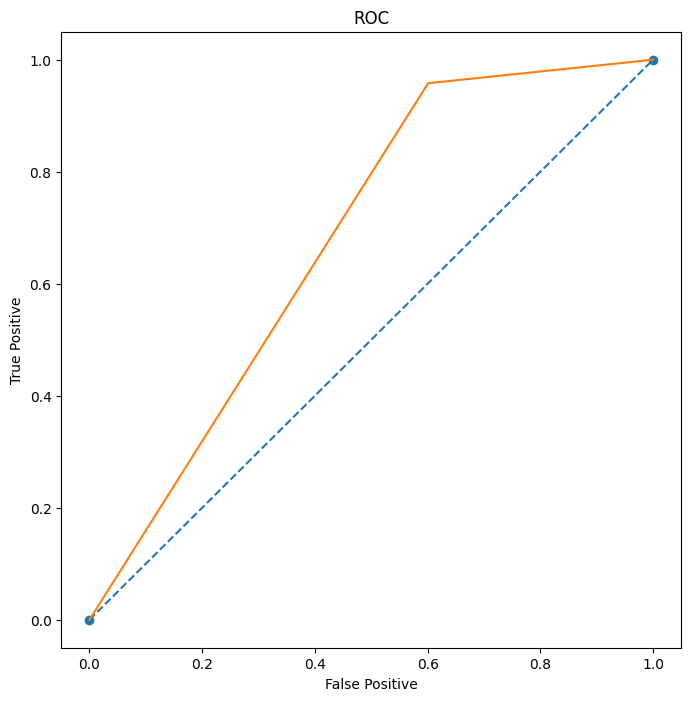

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

fig = plt.figure(figsize=(8, 8))

plt.plot([0, 1], [0, 1], 'o--')

plt.plot(fpr, tpr)
plt.title('ROC')
plt.xlabel('False Positive')
plt.ylabel('True Positive') 
plt.title('ROC') 
plt.show()